# Tensor Flow

TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.![330px-TensorFlowLogo.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/330px-TensorFlowLogo.svg.png)

+ Open Source backed by Google
+ Good for heavy numerical computations
+ Tailored for Machine Learning and Deep Neural Networks
+ Has a C/C++ backend (Runs much faster than a vanila Python) and brings a Python and C++ API

### Data Flow Graphs
+ TensorFlow uses dataflow graphs to represent a computation in terms of dependancyies between operations. The programming model is to create a dataflow graph and then execute through a session 
![tensors_flowing.gif](https://www.tensorflow.org/images/tensors_flowing.gif)
* Is highly parallel
* Gives scope ofr distributed computation (A switch between CPU, GPU and TPU)
* Provides faster execution by fusing adjacent operations (Compilation)
* Portability, Model can be built in Python and saved and can be used for a C++ program

Importing TensorFlow, pip install --upgrade tensorflow to install tf

In [1]:
import tensorflow as tf

C:\IntelPython3\envs\idpfull\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Building a Graph
Source Operations, which do not need any input information 

In [2]:
a = tf.constant([2])
b = tf.constant([5])
c = tf.add(a,b)

In [3]:
c # c does not hold any output as such and is just a tensor mapped to add a and b 

<tf.Tensor 'Add:0' shape=(1,) dtype=int32>

In [10]:
session = tf.Session()

In [7]:
result = session.run(c)
print(result)

[7]


In [8]:
session.close()

1) Build a Graph tf.add(a,b)

2) Create a session and call run on the graph created

3) Close the session to release resources

As mathematical objects: <br><br>
<img src="https://ibm.box.com/shared/static/kmxz570uai8eeg6i6ynqdz6kmlx1m422.png">
<div style="text-align:center">[[Image Source]](https://book.mql4.com/variables/arrays)</div>

## Data Structures in Tensor Flow

In [16]:
scalar = tf.constant([5000])
vector = tf.constant([10,50,800])
matrix = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
tensor = tf.constant([[[1,2,3],[2,3,4],[3,4,5]], [[4,5,6],[5,6,7],[6,7,8]], [[7,8,9],[8,9,10],[9,10,11]]])  #3x3x3 (3x3 across three channels)


In [43]:
#Variables


state = tf.Variable(1)
one = tf.constant([1])
new_one = tf.add(state, one)
# A variable needs to be initialized before use tf.initialize_all_variables() does this work 
#result = session.run(state) # will run into an error as the variable is not initialized

init_op = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(init_op)
    print(session.run(state))
    print(session.run(new_one))

1
[2]


In [52]:
# Placeholders is used to feed the data from outside of a tensorflow model 
a = tf.placeholder(tf.float32)  # need to give the complete datatype

b = a**2

with tf.Session() as session:
    result = session.run(b,feed_dict={a:6})
    print(result)
#Any number of values can be given as it is fed as a dictionary and still the run is expecting only one value here     

36.0


Let us try to fit the random numbers on to a polynomial function $$y = 5x^4 - 7x^3 + 5x -2.8$$ 

In [234]:
x_train=np.random.rand(5000)
y_train=x_train**4+x_train**3-x_train
x_train=x_train.reshape(len(x_train),1)
# A beautiful lesson on the curse of Diminishing Returns
x_test=np.linspace(0,1,10)
y_test=x_test**4+x_test**3-x_test
x_test=x_test.reshape(len(x_test),1)


model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=45))
model.add(Activation('relu'))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',
              optimizer='sgd')


Epoch 1/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.0157
Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.0064
Epoch 3/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.0034
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.0022
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.0015
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.0010
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 7.6473e-04
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 5.8270e-04
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 4.5572e-04
Epoch 10/50
50000/50000 [==============================] - 3s 56us/step - loss: 3.6474e-04
Epoch 11/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.9774e-04
Epoch 12/50
50000/50000 [=======

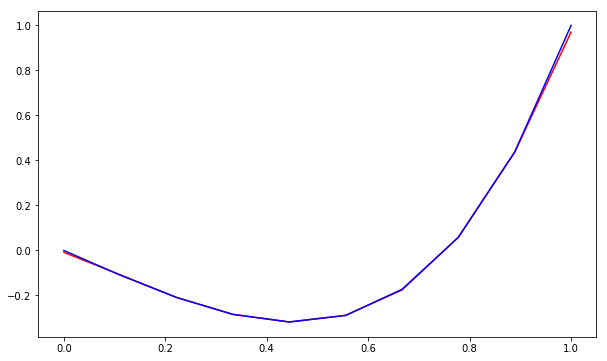

In [238]:
model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=1)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=100)

classes = model.predict(x_test, batch_size=1)

test=x_test.reshape(-1)
plt.plot(test,classes,c='r')
plt.plot(test,y_test,c='b')
plt.show()

In [ ]:
##Convolution vs Cross-Correlation 

In [70]:
import numpy as np
np.random.random([3,3,1,1])

array([[[[0.32916529]],

        [[0.81633941]],

        [[0.35157139]]],


       [[[0.96196602]],

        [[0.79154537]],

        [[0.81330189]]],


       [[[0.16032135]],

        [[0.09768704]],

        [[0.32141841]]]])

In [3]:
in1 = tf.Variable(tf.random_normal([1,10,10,1]))
fltr = tf.Variable(tf.random_normal([3,3,1,1]))

In [60]:
%time opwithpadding = tf.nn.conv2d(in1, fltr, strides=[1,1,1,1], padding='SAME')  # retains same size 10X10

#   1 X  (10X10) Conv 3 X (3X1) arrays

%time opwithnopadding = tf.nn.conv2d(in1, fltr, strides=[1,1,1,1], padding='VALID')  # input - filter +1 size 8X8 

Wall time: 993 µs
Wall time: 945 µs


In [75]:
4*2

8

In [62]:
with tf.Session() as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    %time print(session.run(opwithnopadding))
    %time print(session.run(opwithpadding))

[[[[ 1.0578686 ]
   [-3.7649472 ]
   [-5.0892825 ]
   [ 1.8870692 ]
   [ 5.73699   ]
   [-2.175654  ]
   [-7.6429496 ]
   [ 0.37922674]]

  [[ 4.8456807 ]
   [-2.9689376 ]
   [ 0.62603045]
   [ 2.839227  ]
   [ 1.7731391 ]
   [-4.286278  ]
   [-0.2755674 ]
   [-0.50356156]]

  [[ 4.46611   ]
   [-2.3961942 ]
   [-1.6677423 ]
   [ 2.6649065 ]
   [ 3.0636454 ]
   [-5.946838  ]
   [-6.403472  ]
   [-3.0676098 ]]

  [[-0.23702437]
   [-2.032251  ]
   [-1.6297423 ]
   [ 0.06239989]
   [ 0.5634524 ]
   [-8.406761  ]
   [-0.9992273 ]
   [-0.76279205]]

  [[-1.3795543 ]
   [-1.4852816 ]
   [ 1.4386551 ]
   [-0.44974208]
   [ 1.4707255 ]
   [-5.2356014 ]
   [-1.6698323 ]
   [ 1.659137  ]]

  [[ 1.0164473 ]
   [ 0.6753421 ]
   [-4.7678547 ]
   [-5.081696  ]
   [ 3.7133868 ]
   [-0.719852  ]
   [ 3.3986757 ]
   [ 2.038337  ]]

  [[ 0.2909453 ]
   [ 3.116968  ]
   [ 1.8020649 ]
   [-5.268007  ]
   [ 3.872973  ]
   [-2.3051968 ]
   [ 0.571586  ]
   [-2.353281  ]]

  [[ 3.517624  ]
   [-0.850234  ]


In [2]:
import tensorflow as tf
tf.__version__

C:\IntelPython3\envs\idpfull\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.8.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Two ways of runnig a tensor flow code
+ Build the graph and run the ops
+ Run it interactively on the fly

In [3]:
sess = tf.InteractiveSession()

In [4]:
x  = tf.placeholder(tf.float32, shape=[None, 784])  #  28x28 matrix spread through the line array
y_ = tf.placeholder(tf.float32, shape=[None, 10])  # predicted label 0-9

In [8]:
# Weight tensor
W = tf.Variable(tf.zeros([784,10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

In [9]:
# run the op initialize_all_variables using an interactive session
sess.run(tf.global_variables_initializer())

In [12]:
#mathematical operation to add weights and biases to the inputs
tf.matmul(x,W) + b

<tf.Tensor 'add_2:0' shape=(?, 10) dtype=float32>

In [13]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [16]:
#Load 50 training examples for each training iteration   
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [17]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(acc) )

The final accuracy for the simple ANN model is: 90.60999751091003 % 
